Discovering Rule Lists with Preferred Variables (S-CLASSY)

- Creates dataframes for all datasets
- Discovers three expert (empirical) knowledge sets (bottom, random, top) for all datasets and saves them to files.
- Evaluates the ROCAUC, overfitting of the all  S-CLASSY sets (bottom, random, top) vs CLASSY and RF

In [1]:
import pandas as pd
import numpy as np
import random
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

from rulelist import RuleListClassifier
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

/Users/jo/Documents/Work/PhD/Code/CLASSY-based/CLASSY/MDLRuleLists-Ioanna/S-CLASSY_top_relative_compression.txt
/Users/jo/Documents/Work/PhD/Code/CLASSY-based/CLASSY/MDLRuleLists-Ioanna/S-CLASSY_bottom_relative_compression.txt
/Users/jo/Documents/Work/PhD/Code/CLASSY-based/CLASSY/MDLRuleLists-Ioanna/S-CLASSY_random_relative_compression.txt
/Users/jo/Documents/Work/PhD/Code/CLASSY-based/CLASSY/MDLRuleLists-Ioanna/CLASSY_relative_compression.txt
/Users/jo/Documents/Work/PhD/Code/CLASSY-based/CLASSY/MDLRuleLists-Ioanna/S-CLASSY_top_runtime.txt
/Users/jo/Documents/Work/PhD/Code/CLASSY-based/CLASSY/MDLRuleLists-Ioanna/S-CLASSY_bottom_runtime.txt
/Users/jo/Documents/Work/PhD/Code/CLASSY-based/CLASSY/MDLRuleLists-Ioanna/S-CLASSY_random_runtime.txt
/Users/jo/Documents/Work/PhD/Code/CLASSY-based/CLASSY/MDLRuleLists-Ioanna/CLASSY_runtime.txt


In [2]:
#--- Import datasets; use your own path to the datasets, and modify _size, _K, and name ---#

adult_df = pd.read_csv('../../../../Datasets/LUCS_KDD2/fixed_datasets/adult_fixed.csv', index_col=[0]) #index_col=[0] to deal with "Unnamed: 0"
tictactoe_size = [958, 9]
adult_size = [45222,14]
adult_K = 2
adult_df.name = 'Adult dataset'

breast_df = pd.read_csv('../../../../Datasets/LUCS_KDD2/fixed_datasets/breast_fixed.csv', index_col=[0])
breast_size = [683,9]
breast_K = 1
breast_df.name = 'Breast dataset'

congres_df = pd.read_csv('../../../../Datasets/LUCS_KDD2/fixed_datasets/congres_fixed.csv', index_col=[0])
congres_size = [231,16]
congres_K = 2
congres_df.name = 'Cong. voting dataset'

dermatology_df = pd.read_csv('../../../../Datasets/LUCS_KDD2/fixed_datasets/dermatology_fixed.csv', index_col=[0])
dermatology_size = [358,12]
dermatology_K = 2
dermatology_df.name = 'Dermatology dataset'

heart_df = pd.read_csv('../../../../Datasets/LUCS_KDD2/fixed_datasets/heart_fixed.csv', index_col=[0])
heart_size = [297,13]
heart_K = 2
heart_df.name = 'Heart dataset'

ionosphere_df = pd.read_csv('../../../../Datasets/LUCS_KDD2/fixed_datasets/ionosphere_fixed.csv', index_col=[0]) 
ionosphere_size = [351, 34]
ionosphere_K = 4
ionosphere_df.name = 'Ionosphere dataset'

iris_df = pd.read_csv('../../../../Datasets/LUCS_KDD2/fixed_datasets/iris_fixed.csv', index_col=[0]) 
iris_size = [150, 4]
iris_K = 1
iris_df.name = 'Iris dataset'

led7_df = pd.read_csv('../../../../Datasets/LUCS_KDD2/fixed_datasets/led7_fixed.csv', index_col=[0]) 
led7_size = [3200, 7]
led7_K = 1
led7_df.name = 'Led7 dataset'

letter_df = pd.read_csv('../../../../Datasets/LUCS_KDD2/fixed_datasets/letter_fixed.csv', index_col=[0]) 
letter_size = [20000, 16]
letter_K = 2
letter_df.name = 'Letter dataset'

mushroom_df = pd.read_csv('../../../../Datasets/LUCS_KDD2/fixed_datasets/mushroom_fixed.csv', index_col=[0]) 
tictactoe_size = [958, 9]
mushroom_size = [5644,21]
mushroom_K = 3
mushroom_df.name = 'Mushroom dataset'

tictactoe_df = pd.read_csv('../../../../Datasets/LUCS_KDD2/fixed_datasets/tictactoe_fixed.csv', index_col=[0]) 
tictactoe_size = [958, 9]
tictactoe_K = 1
tictactoe_df.name = 'TicTacToe dataset'

pendigits_df = pd.read_csv('../../../../Datasets/LUCS_KDD2/fixed_datasets/pendigits_fixed.csv', index_col=[0]) 
pendigits_size = [10992, 16]
pendigits_K = 3 #2
pendigits_df.name = 'Pen digits dataset'

pimaindians_df = pd.read_csv('../../../../Datasets/LUCS_KDD2/fixed_datasets/pimaindians_fixed.csv', index_col=[0]) 
pimaindians_size = [768, 8]
pimaindians_K = 1
pimaindians_df.name = 'Pima Indians dataset'

waveform_df = pd.read_csv('../../../../Datasets/LUCS_KDD2/fixed_datasets/waveform_fixed.csv', index_col=[0]) 
waveform_size = [5000, 21]
waveform_K = 3
waveform_df.name = 'Waveform dataset'

wine_df = pd.read_csv('../../../../Datasets/LUCS_KDD2/fixed_datasets/wine_fixed.csv', index_col=[0]) 
wine_size = [178,13]
wine_K = 3
wine_df.name = 'Wine dataset'
#------------------------------------------------------------------------------------

In [3]:
#--- Choose one dataset and initialise limit (K) for selectors ---#

df = wine_df
size = wine_size
K = wine_K 
name = wine_df.name
#print(df.iloc[: , -1].value_counts())
#print(df)

In [4]:
#--- Sets Y, x and X. Works for all datasets if only the target is the last column ---#

Y = pd.Series(df.iloc[: , -1].values)
x = df.iloc[:,:-1]
X = pd.DataFrame(x)

/Users/jo/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


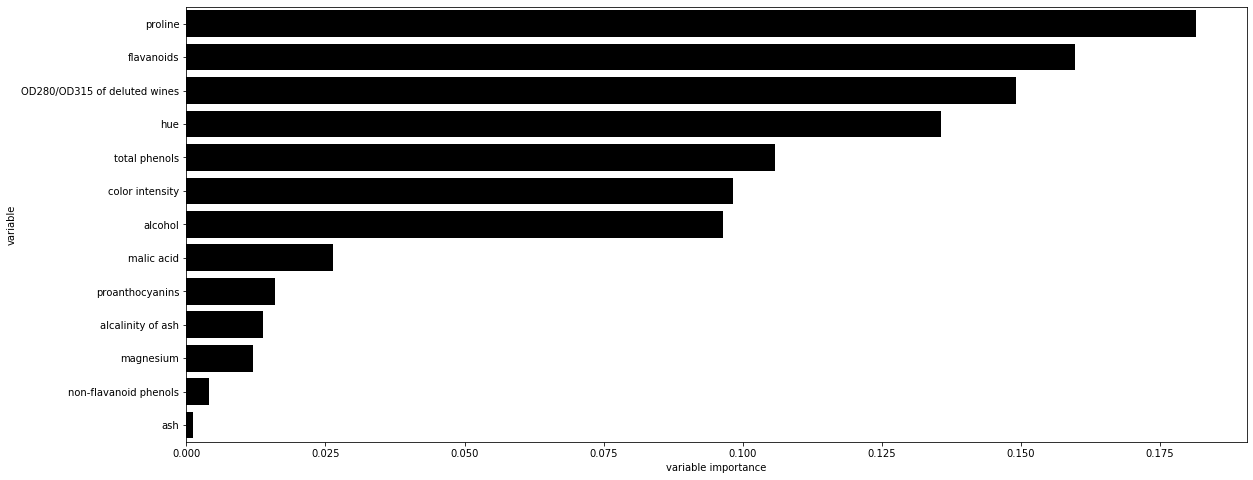

In [5]:
#--- Discover the expert (empirical) knowledge (Random Forest: top-K important features based on entropy) ---#

random_forest_model = RandomForestClassifier(n_estimators = 100, max_leaf_nodes = 5, max_depth = 4, random_state = 17, criterion = "entropy") #The maximum depth of the tree a.k.a., conditions
random_forest_model.fit(X, Y) 
importances = random_forest_model.feature_importances_

forest = RandomForestClassifier(random_state=0)
forest.fit(X, Y)

frame = {'variable': X.columns, 'variable importance': importances}
forest_importances_df = pd.DataFrame(frame)

#--- Create the dictionary with sorted (high to low) features based on importance ---#

feature_importance_dict = dict(zip(X.columns, importances))
sorted_feature_importance_dict = dict(sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse = True))

#--- Get K items in dictionary ---#

top_K_features = dict(list(sorted_feature_importance_dict.items())[0: K])
bottom_K_features = dict(list(sorted_feature_importance_dict.items())[-K:])
random_K_features = dict(random.sample(list(sorted_feature_importance_dict.items()), K))
plt.figure(figsize = (19,8))
sns.barplot(x ='variable importance', y ='variable', data = forest_importances_df, color = 'black', order = forest_importances_df.sort_values('variable importance',ascending = False).variable)

#plt.savefig('variable_importance_[%s].png' % df.name, dpi=300) 

In [6]:
#--- Write to file expert_knowledge.csv first the *, selectors ---#

with open('expert_knowledge_top_K.csv', mode='wt', encoding='utf-8') as expert_file:
    expert_file.write('\n*\n')
    expert_file.write('\n'.join(list(top_K_features.keys())))

with open('expert_knowledge_bottom_K.csv', mode='wt', encoding='utf-8') as expert_file:
    expert_file.write('\n*\n')
    expert_file.write('\n'.join(list(bottom_K_features.keys())))
    
with open('expert_knowledge_random_K.csv', mode='wt', encoding='utf-8') as expert_file:
    expert_file.write('\n*\n')
    expert_file.write('\n'.join(list(random_K_features.keys())))


In [7]:
#--- 10-fold cross validation and roc_auc_score ---#

print(name.replace(" ", "-"))
print('\n')
#k_fold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 17)   #--- unbalanced classes ---#
k_fold = KFold( n_splits = 10, shuffle = True, random_state = 17)             #--- balanced classes ---#

validation_score_list_S_CLASSY_top_test = []
validation_score_list_S_CLASSY_bottom_test = []
validation_score_list_S_CLASSY_random_test = []
validation_score_list_CLASSY_test = []
validation_score_list_RF_test = []

validation_score_list_S_CLASSY_top_train = []
validation_score_list_S_CLASSY_bottom_train = []
validation_score_list_S_CLASSY_random_train = []
validation_score_list_CLASSY_train = []
validation_score_list_RF_train = []

roc = {label: [] for label in Y.unique()}
_X_ = np.array(X)
_Y_ = np.array(Y)

fold = 1
#for train_index, test_index in k_fold.split(_X_, _Y_):                     #--- StratifiedKFold ---#
for train_index, test_index in k_fold.split(_X_):                           #--- KFold ---# 
    
    print('Iteration', fold)
    fold += 1
    print('\n')
    X_train, X_test = _X_[train_index], _X_[test_index]
    y_train, y_test = _Y_[train_index], _Y_[test_index]
    
    X_train = pd.DataFrame(X_train, index =  train_index, columns = X.columns) 
    X_test = pd.DataFrame(X_test, index =  test_index, columns = X.columns)    
    y_train = pd.DataFrame(y_train, index = train_index, columns = ['subset'])
    y_train = y_train['subset']
    y_test = pd.DataFrame(y_test, index = test_index, columns = ['subset'])
    y_test = y_test['subset']
  
    #--- For multiclass datasets ---#
    y_train = label_binarize(y_train, classes = Y.unique())                               
    y_test = label_binarize(y_test, classes = Y.unique())     
    
    
    #---------------------------- RF -------------------------------#

    random_forest_model = RandomForestClassifier(n_estimators = 100, max_leaf_nodes = 5, max_depth = 4, random_state = 17, criterion = "entropy") #The maximum depth of the tree a.k.a., conditions


    random_forest_model.fit(X_train, y_train) 
    y_pred = random_forest_model.predict(X_test)                                                                 
    y_pred_train = random_forest_model.predict(X_train)                                                         
    fold_roc_auc_score_RF_test = roc_auc_score(y_test, y_pred, average = 'weighted')                  
    fold_roc_auc_score_RF_train = roc_auc_score(y_train, y_pred_train, average = 'weighted')       
    
    validation_score_list_RF_test.append(fold_roc_auc_score_RF_test)
    validation_score_list_RF_train.append(fold_roc_auc_score_RF_train)
    
    #-------------------------S-CLASSY-------------------------------#
    
    model_S_CLASSY = RuleListClassifier(discretization = 'static')
    
    #------------------------ bottom-K ------------------------------#
    print('BOTTOM')
    model_S_CLASSY.fit_S_CLASSY(X_train, y_train, Y.unique(), 'expert_knowledge_bottom_K.csv')
    y_pred = model_S_CLASSY.predict(X_test)                                                                 
    y_pred_train = model_S_CLASSY.predict(X_train)                                                         
    fold_roc_auc_score_S_CLASSY_test = roc_auc_score(y_test, y_pred, average = 'weighted')                 
    fold_roc_auc_score_S_CLASSY_train = roc_auc_score(y_train, y_pred_train, average = 'weighted')          

    validation_score_list_S_CLASSY_bottom_test.append(fold_roc_auc_score_S_CLASSY_test)    
    validation_score_list_S_CLASSY_bottom_train.append(fold_roc_auc_score_S_CLASSY_train)

    #------------------------- random-K -----------------------------#
    print('RANDOM')
    model_S_CLASSY.fit_S_CLASSY(X_train, y_train, Y.unique(), 'expert_knowledge_random_K.csv')
    y_pred = model_S_CLASSY.predict(X_test)                                                                
    y_pred_train = model_S_CLASSY.predict(X_train)                                                          
    fold_roc_auc_score_S_CLASSY_test = roc_auc_score(y_test, y_pred, average = 'weighted')                  
    fold_roc_auc_score_S_CLASSY_train = roc_auc_score(y_train, y_pred_train, average = 'weighted')          
    
    validation_score_list_S_CLASSY_random_test.append(fold_roc_auc_score_S_CLASSY_test)
    validation_score_list_S_CLASSY_random_train.append(fold_roc_auc_score_S_CLASSY_train)
    
    #------------------------- top-K --------------------------------#
    print('TOP')
    model_S_CLASSY.fit_S_CLASSY(X_train, y_train, Y.unique(), 'expert_knowledge_top_K.csv')  
    y_pred = model_S_CLASSY.predict(X_test)                                                                 
    y_pred_train = model_S_CLASSY.predict(X_train)                                                         
    fold_roc_auc_score_S_CLASSY_test = roc_auc_score(y_test, y_pred, average = 'weighted')                  
    fold_roc_auc_score_S_CLASSY_train = roc_auc_score(y_train, y_pred_train, average = 'weighted')          
    
    validation_score_list_S_CLASSY_top_test.append(fold_roc_auc_score_S_CLASSY_test) 
    validation_score_list_S_CLASSY_top_train.append(fold_roc_auc_score_S_CLASSY_train)
    
    #------------------------- CLASSY -------------------------------#
    print('CLASSY ')
    model_CLASSY = RuleListClassifier(discretization = 'static')
    
    model_CLASSY.fit(X_train, y_train, Y.unique())
    y_pred = model_CLASSY.predict(X_test)                                                                 
    y_pred_train = model_CLASSY.predict(X_train)                                                         
    fold_roc_auc_score_CLASSY_test = roc_auc_score(y_test, y_pred, average = 'weighted')                  
    fold_roc_auc_score_CLASSY_train = roc_auc_score(y_train, y_pred_train, average = 'weighted')       
    
    validation_score_list_CLASSY_test.append(fold_roc_auc_score_CLASSY_test)
    validation_score_list_CLASSY_train.append(fold_roc_auc_score_CLASSY_train)
    
    
print('Evaluation criteria:')
print('\n')
print('------------------------------')
print('mean ROCAUC S-CLASSY test (bottom-K): ', np.average(validation_score_list_S_CLASSY_bottom_test)) 
print('mean ROCAUC S-CLASSY test (random-K): ', np.average(validation_score_list_S_CLASSY_random_test)) 
print('mean ROCAUC S-CLASSY test (top-K): ', np.average(validation_score_list_S_CLASSY_top_test))       
print('------------------------------')
print('mean ROCAUC CLASSY test: ', np.average(validation_score_list_CLASSY_test)) 
print('------------------------------')
print('------------------------------')
print('mean ROCAUC S-CLASSY train (bottom-K): ', np.average(validation_score_list_S_CLASSY_bottom_train)) 
print('mean ROCAUC S-CLASSY train (random-K): ', np.average(validation_score_list_S_CLASSY_random_train)) 
print('mean ROCAUC S-CLASSY train (top-K): ', np.average(validation_score_list_S_CLASSY_top_train))       
print('------------------------------')
print('mean ROCAUC CLASSY train: ', np.average(validation_score_list_CLASSY_train))                 
print('------------------------------')
print('------------------------------')
print('Overfitting S-CLASSY (bottom-K):', abs(np.average(validation_score_list_S_CLASSY_bottom_train) - np.average(validation_score_list_S_CLASSY_bottom_test)))
print('Overfitting S-CLASSY (random-K):', abs(np.average(validation_score_list_S_CLASSY_random_train) - np.average(validation_score_list_S_CLASSY_random_test)))
print('Overfitting S-CLASSY (top-K):', abs(np.average(validation_score_list_S_CLASSY_top_train) - np.average(validation_score_list_S_CLASSY_top_test)))
print('------------------------------')
print('Overfitting CLASSY:', abs(np.average(validation_score_list_CLASSY_train) - np.average(validation_score_list_CLASSY_test)))
print('------------------------------')
print('------------------------------')
print('mean ROCAUC RF test: ', np.average(validation_score_list_RF_test)) 
print('mean ROCAUC RF train: ', np.average(validation_score_list_RF_train)) 
print('Overfitting RF:', abs(np.average(validation_score_list_RF_train) - np.average(validation_score_list_RF_test)))
print('------------------------------')



Wine-dataset


Iteration 1


BOTTOM
Preferred variables:	 ['magnesium', 'non-flavanoid phenols', 'ash']
Rule list: IF non-flavanoid phenols >= 36.0 AND flavanoids < 32.0 AND malic acid >= 8.0 THEN usage = 36;  Pr(67) = 0.0 Pr(66) = 0.0 Pr(68) = 1.0	ELSE IF hue < 52.0 AND color intensity >= 49.0 THEN usage = 7;  Pr(67) = 0.0 Pr(66) = 0.0 Pr(68) = 1.0	ELSE IF proline >= 65.0 AND total phenols >= 28.0 THEN usage = 55;  Pr(67) = 0.05454545454545454 Pr(66) = 0.9454545454545454 Pr(68) = 0.0	ELSE usage = 62;  Pr(67) = 0.9516129032258065 Pr(66) = 0.03225806451612903 Pr(68) = 0.016129032258064516
S-CLASSY (bottom) runtime - sec:  2.6692469120025635


RANDOM
Preferred variables:	 ['alcohol', 'malic acid', 'proline']
Rule list: IF proline >= 61.0 AND flavanoids < 32.0 AND malic acid >= 8.0 THEN usage = 36;  Pr(67) = 0.0 Pr(66) = 0.0 Pr(68) = 1.0	ELSE IF hue < 52.0 AND color intensity >= 49.0 THEN usage = 7;  Pr(67) = 0.0 Pr(66) = 0.0 Pr(68) = 1.0	ELSE IF proline >= 65.0 AND total phenols >= 28.0 

Rule list: IF flavanoids < 32.0 AND hue < 53.0 THEN usage = 34;  Pr(67) = 0.0 Pr(66) = 0.0 Pr(68) = 1.0	ELSE IF OD280/OD315 of deluted wines < 57.0 AND magnesium >= 24.0 AND malic acid >= 7.0 THEN usage = 7;  Pr(67) = 0.0 Pr(66) = 0.0 Pr(68) = 1.0	ELSE IF alcohol >= 5.0 AND proline >= 65.0 THEN usage = 39;  Pr(67) = 0.0 Pr(66) = 1.0 Pr(68) = 0.0	ELSE IF malic acid >= 7.0 AND proline >= 64.0 AND hue < 55.0 AND total phenols >= 28.0 THEN usage = 13;  Pr(67) = 0.07692307692307693 Pr(66) = 0.9230769230769231 Pr(68) = 0.0	ELSE usage = 67;  Pr(67) = 0.9701492537313433 Pr(66) = 0.014925373134328358 Pr(68) = 0.014925373134328358
CLASSY runtime (sec): 3.0156021118164062


Iteration 4


BOTTOM
Preferred variables:	 ['magnesium', 'non-flavanoid phenols', 'ash']
Rule list: IF non-flavanoid phenols >= 36.0 AND flavanoids < 32.0 AND malic acid >= 8.0 THEN usage = 34;  Pr(67) = 0.0 Pr(66) = 0.0 Pr(68) = 1.0	ELSE IF OD280/OD315 of deluted wines < 57.0 AND hue < 52.0 THEN usage = 10;  Pr(67) = 0.1 Pr(6

Rule list: IF flavanoids < 32.0 AND 56.0 <= OD280/OD315 of deluted wines < 59.0 AND malic acid >= 8.0 THEN usage = 35;  Pr(67) = 0.0 Pr(66) = 0.0 Pr(68) = 1.0	ELSE IF hue < 52.0 AND 56.0 <= OD280/OD315 of deluted wines < 57.0 THEN usage = 10;  Pr(67) = 0.1 Pr(66) = 0.0 Pr(68) = 0.9	ELSE IF flavanoids >= 33.0 AND proline >= 65.0 THEN usage = 42;  Pr(67) = 0.0 Pr(66) = 1.0 Pr(68) = 0.0	ELSE IF 16.0 <= alcalinity of ash < 17.0 AND proline >= 64.0 AND malic acid >= 7.0 AND total phenols >= 28.0 THEN usage = 10;  Pr(67) = 0.1 Pr(66) = 0.9 Pr(68) = 0.0	ELSE usage = 63;  Pr(67) = 0.9841269841269841 Pr(66) = 0.015873015873015872 Pr(68) = 0.0
S-CLASSY (top) runtime - sec:  2.8666579723358154


CLASSY 
Rule list: IF malic acid >= 8.0 AND flavanoids < 32.0 THEN usage = 35;  Pr(67) = 0.0 Pr(66) = 0.0 Pr(68) = 1.0	ELSE IF hue < 52.0 AND 56.0 <= OD280/OD315 of deluted wines < 57.0 THEN usage = 10;  Pr(67) = 0.1 Pr(66) = 0.0 Pr(68) = 0.9	ELSE IF flavanoids >= 33.0 AND proline >= 65.0 THEN usage = 42;

Rule list: IF flavanoids < 32.0 AND OD280/OD315 of deluted wines < 59.0 AND malic acid >= 8.0 THEN usage = 34;  Pr(67) = 0.0 Pr(66) = 0.0 Pr(68) = 1.0	ELSE IF OD280/OD315 of deluted wines < 57.0 AND hue < 52.0 THEN usage = 10;  Pr(67) = 0.1 Pr(66) = 0.0 Pr(68) = 0.9	ELSE IF alcohol >= 5.0 AND proanthocyanins >= 42.0 THEN usage = 41;  Pr(67) = 0.0 Pr(66) = 1.0 Pr(68) = 0.0	ELSE IF OD280/OD315 of deluted wines >= 57.0 AND proline >= 65.0 AND hue < 55.0 AND malic acid >= 7.0 THEN usage = 13;  Pr(67) = 0.07692307692307693 Pr(66) = 0.9230769230769231 Pr(68) = 0.0	ELSE usage = 63;  Pr(67) = 0.9682539682539683 Pr(66) = 0.031746031746031744 Pr(68) = 0.0
S-CLASSY (top) runtime - sec:  3.1044301986694336


CLASSY 
Rule list: IF malic acid >= 8.0 AND flavanoids < 32.0 THEN usage = 34;  Pr(67) = 0.0 Pr(66) = 0.0 Pr(68) = 1.0	ELSE IF OD280/OD315 of deluted wines < 57.0 AND hue < 52.0 THEN usage = 10;  Pr(67) = 0.1 Pr(66) = 0.0 Pr(68) = 0.9	ELSE IF alcohol >= 5.0 AND proanthocyanins >= 42.0 THEN usa